In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import gmaps

In [56]:
ppp_file = "../Resources/California_PPP.csv"
ppp_data = pd.read_csv(ppp_file)
ppp_data_df = pd.DataFrame(ppp_data)
ppp_data_df.head()

,LoanNumber,DateApproved,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,CurrentApprovalAmount,RuralUrbanIndicator,...,JobsReported,NAICSCode,Race,PAYROLL_PROCEED,BusinessType,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran
0,1048448901,04/24/2021,PPP,HUMANGOOD NORCAL,6120 Stoneridge Mall Rd Ste 300,Pleasanton,CA,94588-3298,10000000.0,U,...,500.0,623311.0,White,9999998.0,Sole Proprietorship,"Washington Federal Bank, National Association",SEATTLE,WA,Female Owned,Non-Veteran
1,1122827105,04/09/2020,PPP,ITO INCORPORATED,431 ISIS AVE,INGLEWOOD,CA,90301-2009,10000000.0,U,...,500.0,722310.0,Asian,9361000.0,Subchapter S Corporation,City National Bank,LOS ANGELES,CA,Male Owned,Non-Veteran
2,1187837109,04/10/2020,PPP,"HAVEN HEALTH GROUP, LLC","31752 COAST HWY, STE 300",LAGUNA BEACH,CA,92651-6782,10000000.0,U,...,500.0,623110.0,White,10000000.0,Limited Liability Company(LLC),East West Bank,PASADENA,CA,Male Owned,Non-Veteran
3,1321898800,04/10/2021,PPP,NORTH EAST MEDICAL SERVICES,2171 Junipero Serra Blvd,Daly City,CA,94014-1906,10000000.0,U,...,205.0,621498.0,Unanswered,10000000.0,501(c)3 – Non Profit,East West Bank,PASADENA,CA,Unanswered,Unanswered
4,1322998906,04/24/2021,PPP,PACIFIC CLINICS,800 S Santa Anita Ave,Arcadia,CA,91006-3536,10000000.0,U,...,103.0,621420.0,White,9999996.0,Non-Profit Organization,East West Bank,PASADENA,CA,Male Owned,Veteran


In [12]:
ppp_data_df.describe()

,LoanNumber,CurrentApprovalAmount,JobsReported,NAICSCode,PAYROLL_PROCEED
count,1.302241e+06,1.302241e+06,1.302241e+06,1.278782e+06,1.300895e+06
mean,5.462761e+09,7.976483e+04,8.747051e+00,5.624890e+05,7.776448e+04
std,2.562396e+09,2.767875e+05,2.744165e+01,1.722955e+05,2.680950e+05
min,1.000047e+09,1.000000e+00,0.000000e+00,1.111100e+05,0.000000e+00
25%,3.266149e+09,1.093700e+04,1.000000e+00,4.841100e+05,1.067700e+04
50%,5.444088e+09,2.083200e+04,2.000000e+00,5.416110e+05,2.083000e+04
75%,7.625048e+09,5.159100e+04,7.000000e+00,7.115100e+05,5.022000e+04
max,9.998997e+09,1.000000e+07,5.000000e+02,9.999900e+05,1.000000e+07


In [60]:
total_money = ppp_data_df["CurrentApprovalAmount"].sum()



103873033500.0


In [50]:
total_loans = ppp_data_df['ProcessingMethod'].count()
loan_type_count = ppp_data_df["ProcessingMethod"].value_counts()
loan_type_percentage = round(loan_type_count/ total_loans * 100, 2)
loan_demo_df = pd.DataFrame({"Percentage of Players": loan_type_percentage, "Total Count": loan_type_count})

loan_demo_df

,Percentage of Players,Total Count
PPP,72.71,946907
PPS,27.29,355334


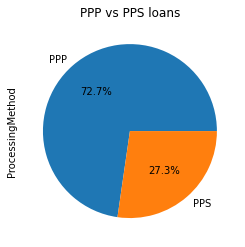

In [53]:
pie_plot = loan_type_count.plot.pie(autopct="%1.1f%%", title= "PPP vs PPS loans")

In [51]:
summary_df = ppp_data_df.groupby('ProcessingMethod')

amount_mean = summary_df['CurrentApprovalAmount'].mean()
amount_median = summary_df['CurrentApprovalAmount'].median()
amount_total = summary_df['CurrentApprovalAmount'].sum()

# Assemble the resulting series into a single summary dataframe.
summary_amount_df = pd.DataFrame({'Approval amount mean': amount_mean, 
                                'Approval amount Median': amount_median,
                                'Approval total': amount_total})
summary_amount_df.head()

,Approval amount mean,Approval amount Median,Approval total
ProcessingMethod,,,
PPP,79191.404622,20832.0,7.498690e+10
PPS,81292.919124,20834.0,2.888614e+10


In [76]:
unique_banks = ppp_data_df['OriginatingLender'].unique()
unique_banks_df = pd.DataFrame({"Unique Banks": unique_banks})
unique_banks_df.head()

,Unique Banks
0,"Washington Federal Bank, National Association"
1,City National Bank
2,East West Bank
3,"MUFG Union Bank, National Association"
4,Live Oak Banking Company


AttributeError: 'numpy.ndarray' object has no attribute 'count'